In [1]:
import yfinance as yf
import gpflow as gp
import matplotlib.pyplot as plt

In [14]:
sp500 = yf.download(tickers = ["^GSPC", "^NDX"], start = "1994-01-07", 
                              end = "2021-02-01", interval = "1d")
sp500

[*********************100%***********************]  2 of 2 completed


Adj Close                      Close                       High  \
                  ^GSPC          ^NDX        ^GSPC          ^NDX        ^GSPC   
Date                                                                            
1994-01-07   469.899994    404.779999   469.899994    404.779999   470.260010   
1994-01-10   475.269989    408.910004   475.269989    408.910004   475.269989   
1994-01-11   474.130005    407.850006   474.130005    407.850006   475.279999   
1994-01-12   474.170013    408.470001   474.170013    408.470001   475.059998   
1994-01-13   472.470001    408.000000   472.470001    408.000000   474.170013   
...                 ...           ...          ...           ...          ...   
2021-01-25  3855.360107  13483.290039  3855.360107  13483.290039  3859.229980   
2021-01-26  3849.620117  13490.190430  3849.620117  13490.190430  3870.899902   
2021-01-27  3750.770020  13112.650391  3750.770020  13112.650391  3836.830078   
2021-01-28  3787.379883  13201.530273  3787.379883  13201.530273  3830.500000   
2021-01-29  3714.239990  12925.379883  3714.239990  12925.379883  3778.050049   

                                  Low                       Open  \
                    ^NDX        ^GSPC          ^NDX        ^GSPC   
Date                                                               
1994-01-07    405.420013   467.029999    399.980011   467.089996   
1994-01-10    409.929993   469.549988    404.549988   469.899994   
1994-01-11    409.239990   473.269989    405.589996   475.269989   
1994-01-12    410.579987   472.140015    404.700012   474.130005   
1994-01-13    408.470001   471.799988    404.440002   474.170013   
...                  ...          ...           ...          ...   
2021-01-25  13563.700195  3797.159912  13205.589844  3851.679932   
2021-01-26  13536.299805  3847.780029  13440.320312  3862.959961   
2021-01-27  13393.509766  3732.479980  13034.139648  3836.830078   
2021-01-28  13401.849609  3755.750000  13150.099609  3755.750000   
2021-01-29  13167.870117  3694.120117  12845.429688  3778.050049   

                              Volume               
                    ^NDX       ^GSPC         ^NDX  
Date                                               
1994-01-07    404.209991   324920000    330060000  
1994-01-10    404.779999   319490000    313350000  
1994-01-11    408.910004   305490000    321930000  
1994-01-12    407.850006   310690000    322540000  
1994-01-13    408.470001   277970000    290110000  
...                  ...         ...          ...  
2021-01-25  13515.629883  6955860000   7139410000  
2021-01-26  13507.469727  6029090000   6781460000  
2021-01-27  13371.160156  9878040000  11102160000  
2021-01-28  13163.320312  6937960000   9823150000  
2021-01-29  13124.700195  6612570000   7809670000  

[6814 rows x 12 columns]

In [15]:
sp500_daily_returns = sp500['Adj Close'].pct_change()
sp500_monthly_returns = sp500['Adj Close'].resample('M').ffill().pct_change()

Text(0.5, 1.0, 'SPY500 monthly returns data')

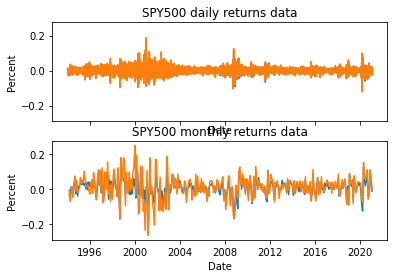

In [16]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
ax1.plot(sp500_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("SPY500 daily returns data")
ax2.plot(sp500_monthly_returns)
ax2.set_xlabel("Date")
ax2.set_ylabel("Percent")
ax2.set_title("SPY500 monthly returns data")

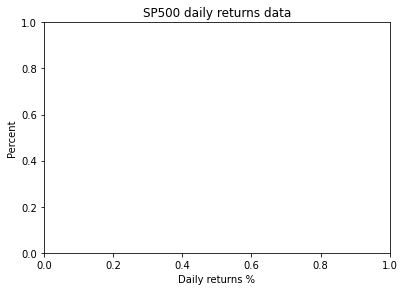

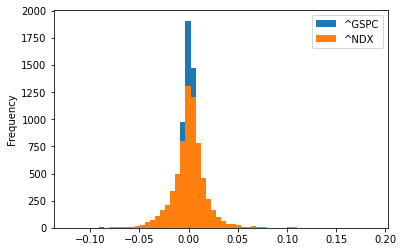

In [19]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
sp500_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("SP500 daily returns data")
plt.show()

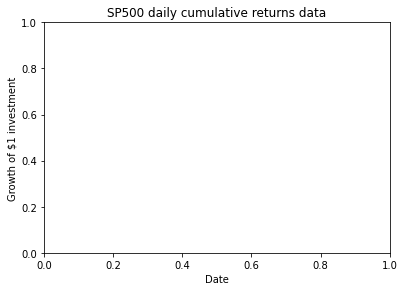

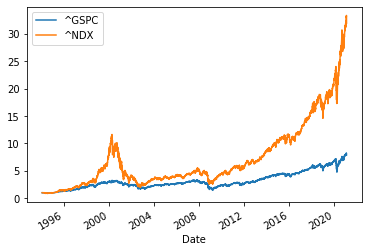

In [18]:
sp500_cum_returns = (sp500_daily_returns + 1).cumprod()

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
sp500_cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("SP500 daily cumulative returns data")
plt.show()